In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
data  = pd.read_csv("humidity(woutlier).csv")
data.head()

,Unnamed: 0,lat,lon,pressure,temperature,humidity
0,0,42.738,23.272,95270.27,23.46,62.48
1,1,42.663,23.273,94355.83,23.06,59.46
2,2,42.700,23.360,95155.81,26.53,44.38
3,3,42.624,23.406,94679.57,28.34,38.28
4,4,42.669,23.318,94327.88,26.31,46.37


In [96]:
data1 = data.drop(["Unnamed: 0"], axis = 1)
data1.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


In [97]:
data2=data1.iloc[:500,]
data2.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


In [98]:
def plot(data):
    for i in range(0,(len(data.columns))-1):
        print("plot between",data.columns[i],"and",data.columns[4])
        for j in range(1,(len(data.columns))):
            if(j==i+1):
                x=data.iloc[:,i:j]
                y=data.iloc[:,4:5]
        plt.figure()
        plt.plot(x,y)
        plt.show()

plot between lat and humidity


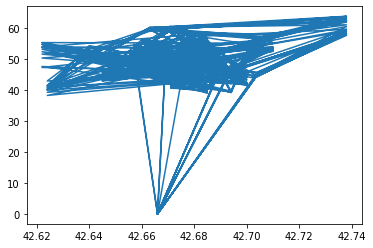

plot between lon and humidity


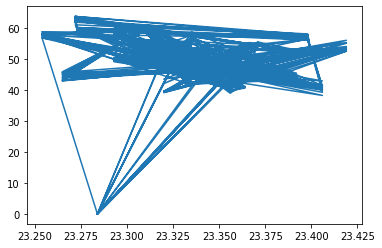

plot between pressure and humidity


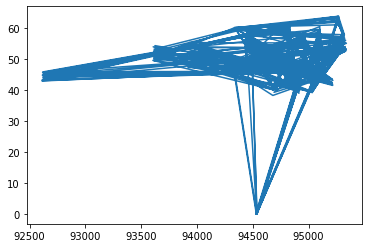

plot between temperature and humidity


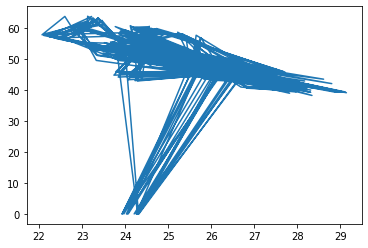

In [99]:
plot(data2)

In [100]:
data3 = data1.drop(["lat", "lon"], axis = 1)
data3.head()

,pressure,temperature,humidity
0,95270.27,23.46,62.48
1,94355.83,23.06,59.46
2,95155.81,26.53,44.38
3,94679.57,28.34,38.28
4,94327.88,26.31,46.37


In [101]:
data3.shape

(692574, 3)

In [102]:
x1=data3.iloc[:,0:1]
x2=data3.iloc[:,1:2]
x=data3.iloc[:,:-1]
y=data3.iloc[:,2:3]


In [103]:
# pressure and humidity
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1,y)
y_pred=lr.predict(x1)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
print(r2_score(y,y_pred))

20.449250395606068
0.0001913089195686446


In [104]:
#temperature and humidity
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x2,y)
y_pred=lr.predict(x2)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
print(r2_score(y,y_pred))

12.962645818185752
0.598255969999421


In [105]:
#pressure,temperature and humidity
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
print(r2_score(y,y_pred))

12.95834574870966
0.5985224650854493


# polynomial regression

In [106]:
# pressure and humidity
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x1)
lr.fit(x_poly,y)
y_pred=lr.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
print(r2_score(y,y_pred))

20.245446587677215
0.02002083045747638


In [107]:
#temperature and humidity
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x2)
lr.fit(x_poly,y)
y_pred=lr.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
print(r2_score(y,y_pred))

12.60011364242206
0.6204132483222808


In [108]:
#pressure,temperature and humidity
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
lr.fit(x_poly,y)
y_pred=lr.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
print(r2_score(y,y_pred))

12.5699580419083
0.6222279889237053


# linear model

In [109]:
def lr_model(i,o):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(i,o)
    y_pred=lr.predict(i)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(o,y_pred))
    print(rmse)
    print(r2_score(o,y_pred))
    


In [110]:
# pressure and humidity
lr_model(x1,y)

20.449250395606068
0.0001913089195686446


In [111]:
#temperature and humidity
lr_model(x2,y)

12.962645818185752
0.598255969999421


In [112]:
#pressure,temperature and humidity
lr_model(x,y)

12.95834574870966
0.5985224650854493


# linear model after splitting 

In [113]:
def lr_split_model(i,o):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(i,o,test_size = 0.20, random_state =0)
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(rmse)
    print(r2_score(y_test,y_pred))
    

In [114]:
# pressure and humidity
lr_split_model(x1,y)

20.467687633775746
0.00019705236152167682


In [115]:
#temperature and humidity
lr_split_model(x2,y)

12.922185739981344
0.6014812032470642


In [116]:
#pressure,temperature and humidity
lr_split_model(x,y)

12.917898125691009
0.6017456184857295


# polynomial model

In [173]:
def poly(i,o):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(i)
    lr.fit(x_poly,o)
    y_pred = lr.predict(x_poly)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(o,y_pred))
    print(rmse)
    print(r2_score(o,y_pred))
    

In [174]:
# pressure and humidity
poly(x1,y)

20.245446587677215
0.02002083045747638


In [175]:
# temperature and humidity
poly(x2,y)

12.60011364242206
0.6204132483222808


In [176]:
#pressure,temperature and humidity
poly(x,y)

12.5699580419083
0.6222279889237053


# polynomial model after splitting

In [182]:
def poly_s(i,o):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(i)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x_poly,o,test_size = 0.20, random_state =0)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(rmse)
    print(r2_score(y_test,y_pred))

In [183]:
# pressure and humidity
poly_s(x1,y)

20.25544295793405
0.02082494269313573


In [184]:
# temperature and humidity
poly_s(x2,y)

12.567587831492823
0.6230526363898503


In [185]:
#pressure,temperature and humidity
poly_s(x,y)

12.536983905556276
0.6248862457251121
